✅ ZIP file extracted!
Dataset shape: (10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57    

/tmp/ipython-input-1679825693.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exited', data=df, palette='Set2')


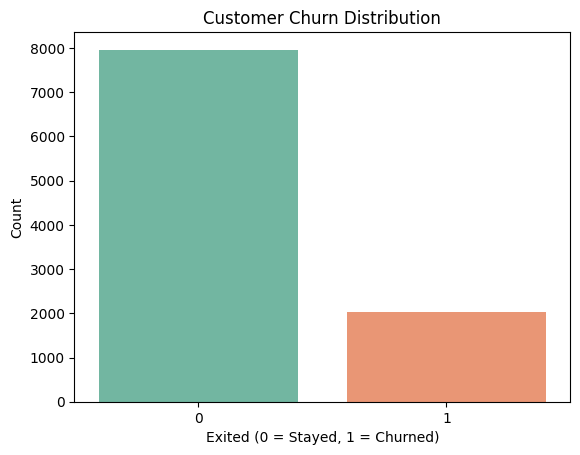


✅ Accuracy Score: 0.8700

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



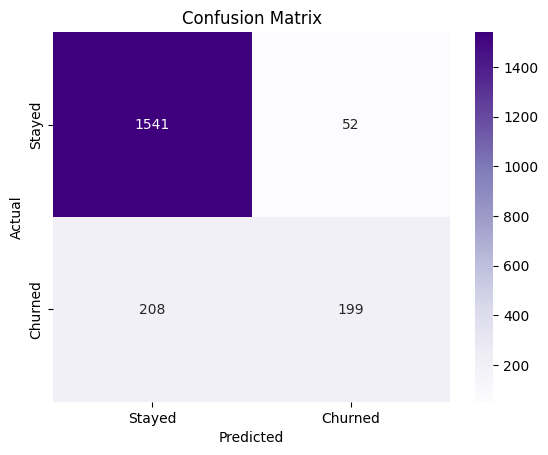

In [13]:
# 📊 CodSoft Task 3 – Customer Churn Prediction (Google Colab ZIP Version)

import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🔓 Step 1: Extract the ZIP file
with zipfile.ZipFile("/content/archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/churn_data")
print("✅ ZIP file extracted!")

# 📄 Step 2: Load the CSV
df = pd.read_csv("/content/churn_data/Churn_Modelling.csv")

# 🔍 Step 3: Preview
print("Dataset shape:", df.shape)
print(df.head())

# 🧹 Step 4: Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# 🧽 Step 5: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 🔁 Step 6: Encode categorical columns
df['gender'] = LabelEncoder().fit_transform(df['gender'])  # Female = 0, Male = 1
df = pd.get_dummies(df, columns=['geography'], drop_first=True)

# 🎯 Step 7: Split features and target
X = df.drop('exited', axis=1)
y = df['exited']

# 📊 Step 8: Churn distribution
sns.countplot(x='exited', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Count')
plt.show()

# 🔀 Step 9: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 🚀 Step 10: Train the model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# 🔮 Step 11: Make predictions
y_pred = model.predict(X_test)

# ✅ Step 12: Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy Score: {acc:.4f}")
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# 📊 Step 13: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Stayed', 'Churned'],
            yticklabels=['Stayed', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
